In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [6]:
all_df = pd.read_excel("data/car.xlsx")

In [11]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]


In [8]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [9]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [10]:
all_df.corr()

,class,buying,maint,doors,persons,lug_boot,safety
class,1.000000,0.28275,0.232422,0.066057,0.341707,0.157932,0.439337
buying,0.282750,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
maint,0.232422,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
doors,0.066057,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
persons,0.341707,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
lug_boot,0.157932,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
safety,0.439337,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000


In [143]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [144]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [145]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))   
train_Features=minmax_scale.fit_transform(train_Features)
test_Features=minmax_scale.fit_transform(test_Features)

/home/bruce/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/bruce/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [146]:
train_Features[:4]

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0.5, 0. ]])

In [147]:
train_Label[:4]

array([0, 0, 0, 0])

In [148]:
train_Label = train_Label.reshape(train_Label.shape[0], 1)

In [149]:
test_Label= test_Label.reshape(test_Label.shape[0], 1)

In [150]:
train_Label.shape

(1373, 1)

In [151]:
from keras.utils import np_utils

In [152]:
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [153]:
train_Label.shape

(1373, 4)

In [154]:
train_Features = train_Features.reshape(train_Features.shape[0], 6, 1, 1)

In [155]:
train_Features.shape

(1373, 6, 1, 1)

In [156]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [157]:
model = Sequential()

In [158]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(6,1,1), 
                 activation='relu'))

In [159]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [160]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [161]:
model.add(Dropout(0.25))

In [162]:
model.add(Flatten())

In [163]:
model.add(Dense(128, activation='tanh'))

In [164]:
model.add(Dropout(0.25))

In [165]:
model.add(Dense(4,activation='sigmoid'))

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 6, 1, 1000)        2000      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 1, 1000)        1001000   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 1, 1000)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 1, 1000)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               768128    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [167]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1373/1373 [==============================] - 11s 8ms/step - loss: 0.1029 - acc: 0.7342


In [168]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=100,verbose=1)

Train on 1098 samples, validate on 275 samples
Epoch 1/10
1098/1098 [==============================] - 7s 7ms/step - loss: 0.0481 - acc: 0.8698 - val_loss: 0.1219 - val_acc: 0.7382
Epoch 2/10
1098/1098 [==============================] - 7s 7ms/step - loss: 0.0459 - acc: 0.8807 - val_loss: 0.1104 - val_acc: 0.7309
Epoch 3/10
1098/1098 [==============================] - 8s 7ms/step - loss: 0.0439 - acc: 0.8716 - val_loss: 0.1107 - val_acc: 0.7127
Epoch 4/10
1098/1098 [==============================] - 8s 7ms/step - loss: 0.0415 - acc: 0.8852 - val_loss: 0.1088 - val_acc: 0.7418
Epoch 5/10
1098/1098 [==============================] - 7s 7ms/step - loss: 0.0407 - acc: 0.8889 - val_loss: 0.1019 - val_acc: 0.7418
Epoch 6/10
1098/1098 [==============================] - 7s 7ms/step - loss: 0.0411 - acc: 0.8880 - val_loss: 0.1069 - val_acc: 0.7309
Epoch 7/10
1098/1098 [==============================] - 14s 12ms/step - loss: 0.0385 - acc: 0.8916 - val_loss: 0.1022 - val_acc: 0.7418
Epoch 8/10
10

In [169]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

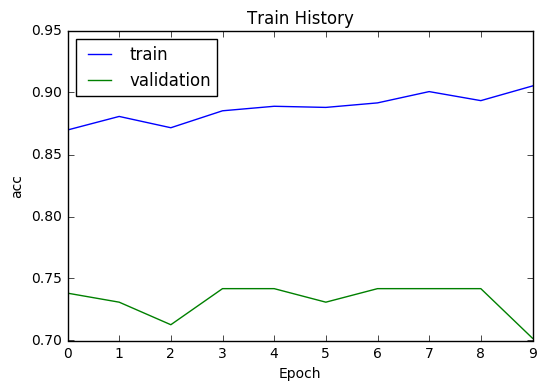

In [170]:
show_train_history(train_history,'acc','val_acc')

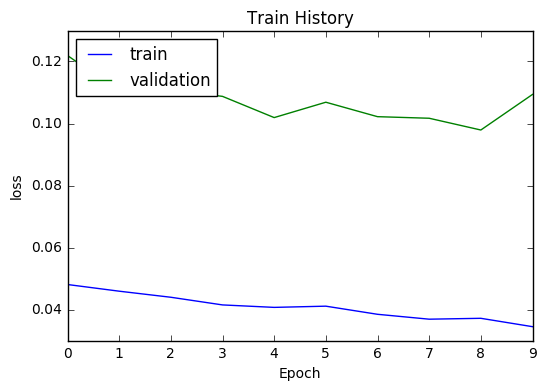

In [171]:
show_train_history(train_history,'loss','val_loss')

In [172]:
test_Features = test_Features.reshape(test_Features.shape[0], 6, 1, 1)

In [173]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 1ms/step


In [174]:
scores[1]

0.8450704226191614